In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
toss=np.array(["s","c","c","c","c"])

In [3]:
def P(H):
    return 1

In [19]:
def P_obs_H(nc,ns,H):
    P=H**nc*(1-H)**ns
    return P

In [33]:
def P_obs(nc,ns,H):
    p=0
    for i in range(len(H)):
        p+=P_obs_H(nc,ns,H[i])
    return p

3.3326654624999987

In [34]:
def P_H_obs(nc,ns,H,toss):
    p=P_obs_H(nc,ns,H)*P(H)/P_obs(nc,ns,H)
    return p

In [47]:
def x_max(y,H):
    for i in range(len(y)-2):
        if np.diff(np.log(y))[i]*np.diff(np.log(y))[i+1]<0 :
            return (H[i]+H[i+1])/2, i

In [56]:
def sigma(y,x_bar,pos):
    return -np.diff(np.log(y))[pos]

In [57]:
H=np.arange(0,1.1,0.01)

In [58]:
y=P_H_obs(np.count_nonzero(toss == "s"),np.count_nonzero(toss == "c"),H,toss)

Text(0, 0.5, 'P(H|obs)')

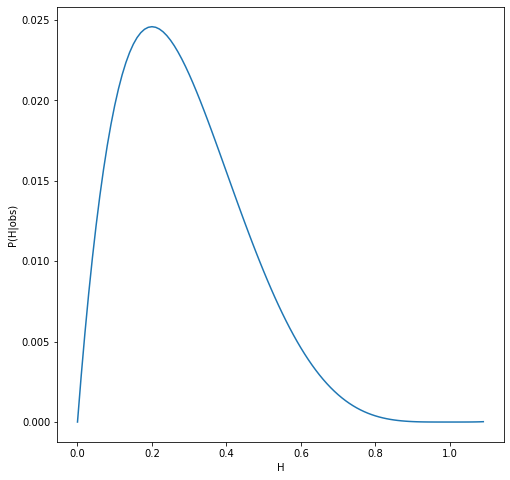

In [59]:
plt.figure(figsize=(8,8))
plt.plot(H,y)
plt.xlabel("H")
plt.ylabel('P(H|obs)')

In [60]:
x_bar=x_max(y, H)[0]
pos=x_max(y, H)[1]
print(x_bar)

0.195


/home/john/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
sig=sigma(y,x_bar,pos)
print(sigma(y,x_bar,pos))
valor=[x_bar,"+/-",sig]

-0.0016032143933220055


/home/john/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [62]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

Text(0.5, 0.98, "[0.195, '+/-', -0.0016032143933220055]")

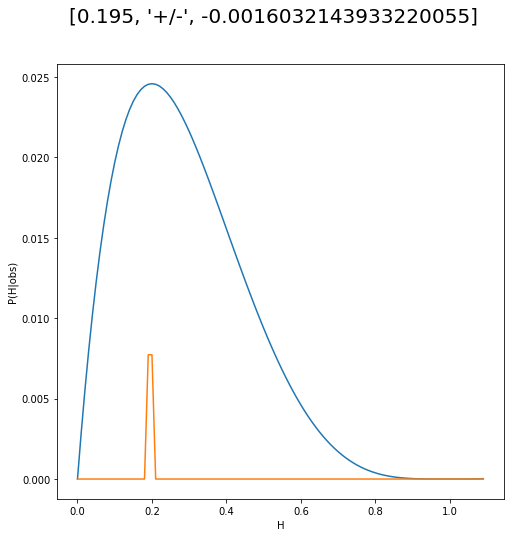

In [63]:
plt.figure(figsize=(8,8))
plt.plot(H,y)
plt.plot(H,gaussian(H,x_bar,sig))
plt.xlabel("H")
plt.ylabel('P(H|obs)')
plt.suptitle(valor, fontsize=20)